# Data Programming in Python | BAIS:6040
# Time Series Analysis

Instructor: Jeff Hendricks

Topics to be covered:
- Analyzing time series data
- Adding lag features and rolling statistics for time series data
- Time series stationarity & decomposition

References: 
- Python for Finance (https://learning.oreilly.com/library/view/python-for-finance/9781492024323/)
- How to Check if Time Series Data is Stationary with Python by Jason Brownlee (https://machinelearningmastery.com/time-series-data-stationary-python/)

- How to Decompose Time Series Data into Trend and Seasonality by Jason Brownlee (https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pfg_data = pd.read_csv('../../Data/PFG.csv',header=0, index_col=0, parse_dates=True)
pfg_data.columns = ['Open','High','Low','Close','AdjClose','Volume']

pfg_data.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2016-01-04,43.810001,44.070000,43.279999,44.040001,35.991669,1816200
2016-01-05,43.790001,44.299999,43.590000,44.139999,36.073399,1487100
2016-01-06,43.200001,43.330002,42.040001,42.320000,34.585995,2110400
2016-01-07,41.299999,41.650002,40.099998,40.230000,32.877945,2936200
2016-01-08,40.720001,41.119999,40.040001,40.139999,32.804390,3309300


In [2]:
# !pip install pandas-datareader

In [3]:
# !pip install yfinance --upgrade --no-cache-dir

In [4]:
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override()
pfg_data = pdr.get_data_yahoo('PFG')#, start, end)

pfg_data.columns = ['Open','High','Low','Close','AdjClose','Volume']

pfg_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2001-10-23,20.500000,21.389999,20.40,21.000000,12.788093,32584000
2001-10-24,21.100000,22.200001,21.00,22.150000,13.488389,5847500
2001-10-25,22.000000,22.150000,21.65,21.950001,13.366598,2038800
2001-10-26,21.950001,22.000000,21.40,21.500000,13.092568,3339100
2001-10-29,22.000000,22.000000,21.00,21.200001,12.909879,1758700


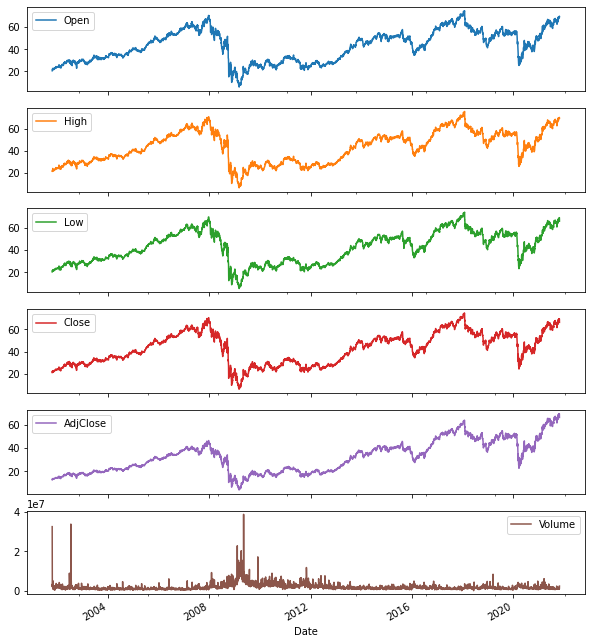

In [5]:
pfg_data.plot(figsize=(10,12), subplots=True)
plt.show()

In [6]:
pfg_data.describe()

,Open,High,Low,Close,AdjClose,Volume
count,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5.039000e+03
mean,42.771099,43.269137,42.265041,42.776285,32.503319,1.824788e+06
std,14.170064,14.199468,14.143749,14.164347,13.829335,1.716164e+06
min,5.730000,6.490000,5.410000,5.880000,3.953964,0.000000e+00
25%,29.469999,29.915000,29.010000,29.464999,19.941059,9.446500e+05
50%,43.680000,44.279999,43.209999,43.759998,32.173794,1.362000e+06
75%,54.150002,54.605000,53.645000,54.184999,41.320024,2.096100e+06
max,74.919998,75.580002,74.330002,75.040001,69.769997,3.884850e+07


In [7]:
# diff() provides absolute changes between two values
pfg_data.diff().head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2001-10-23,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-24,0.600000,0.810001,0.60,1.150000,0.700296,-26736500.0
2001-10-25,0.900000,-0.050001,0.65,-0.199999,-0.121791,-3808700.0
2001-10-26,-0.049999,-0.150000,-0.25,-0.450001,-0.274030,1300300.0
2001-10-29,0.049999,0.000000,-0.40,-0.299999,-0.182690,-1580400.0


In [8]:
pfg_data.diff().mean()

Open           0.009726
High           0.009551
Low            0.009109
Close          0.009025
AdjClose       0.010655
Volume     -6006.967050
dtype: float64

In [9]:
# percent changes rounded to 3 decimal places
pfg_data.pct_change().round(3).head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2001-10-23,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-24,0.029,0.038,0.029,0.055,0.055,-0.821
2001-10-25,0.043,-0.002,0.031,-0.009,-0.009,-0.651
2001-10-26,-0.002,-0.007,-0.012,-0.021,-0.021,0.638
2001-10-29,0.002,0.000,-0.019,-0.014,-0.014,-0.473


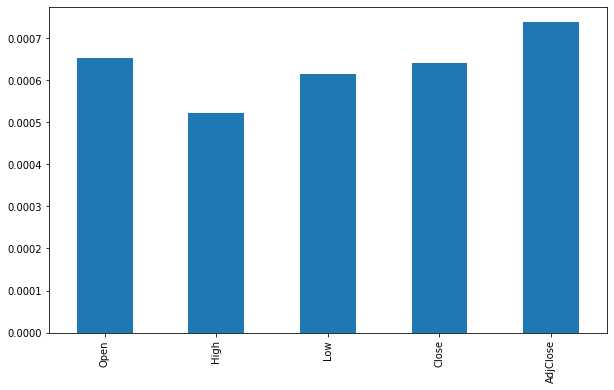

In [10]:
# mean value of percent changes as bar plot

pfg_data[['Open','High','Low','Close','AdjClose']].pct_change().mean().plot(kind='bar', figsize=(10,6))
plt.show()

In [11]:
pfg_data.AdjClose

Date
2001-10-23    12.788093
2001-10-24    13.488389
2001-10-25    13.366598
2001-10-26    13.092568
2001-10-29    12.909879
                ...    
2021-10-21    69.010002
2021-10-22    69.440002
2021-10-25    69.639999
2021-10-26    69.510002
2021-10-27    66.470001
Name: AdjClose, Length: 5039, dtype: float64

In [12]:
# shift() provides a lag value for a given index
pfg_data.AdjClose.shift(1)

Date
2001-10-23          NaN
2001-10-24    12.788093
2001-10-25    13.488389
2001-10-26    13.366598
2001-10-29    13.092568
                ...    
2021-10-21    69.769997
2021-10-22    69.010002
2021-10-25    69.440002
2021-10-26    69.639999
2021-10-27    69.510002
Name: AdjClose, Length: 5039, dtype: float64

In [13]:
pfg_data.AdjClose.tail()

Date
2021-10-21    69.010002
2021-10-22    69.440002
2021-10-25    69.639999
2021-10-26    69.510002
2021-10-27    66.470001
Name: AdjClose, dtype: float64

In [14]:
# using a -1 in shift provides a look-ahead value for a given index
pfg_data.AdjClose.shift(-1)

Date
2001-10-23    13.488389
2001-10-24    13.366598
2001-10-25    13.092568
2001-10-26    12.909879
2001-10-29    13.421410
                ...    
2021-10-21    69.440002
2021-10-22    69.639999
2021-10-25    69.510002
2021-10-26    66.470001
2021-10-27          NaN
Name: AdjClose, Length: 5039, dtype: float64

In [15]:
# log returns

rets = np.log(pfg_data.AdjClose/pfg_data.AdjClose.shift(1))
rets.head()

Date
2001-10-23         NaN
2001-10-24    0.053315
2001-10-25   -0.009070
2001-10-26   -0.020714
2001-10-29   -0.014052
Name: AdjClose, dtype: float64

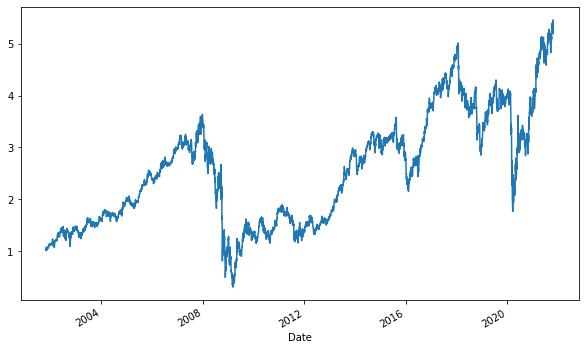

In [16]:
# cumulative log returns over time
# np.exp needed to convert from log returns
rets.cumsum().apply(np.exp).plot(figsize=(10,6))
plt.show()

### Resampling
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.last.html

In [17]:
# last() select final periods of time series data based on a date offset.
# downsample to 1 week

pfg_data.resample('1w', label='right').last().head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2001-10-28,21.950001,22.000000,21.400000,21.500000,13.092568,3339100
2001-11-04,22.100000,22.250000,21.950001,22.180000,13.506656,1183800
2001-11-11,21.500000,21.770000,21.500000,21.600000,13.153463,1601000
2001-11-18,22.000000,22.879999,21.980000,22.250000,13.549282,1851600
2001-11-25,22.879999,22.879999,22.200001,22.379999,13.628446,328800


In [18]:
# downsample to 1 month

pfg_data.resample('1m', label='right').last().head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2001-10-31,22.40,23.990000,21.950001,22.500000,13.701523,5101800
2001-11-30,22.90,23.000000,22.700001,22.950001,13.975553,2255100
2001-12-31,23.60,24.049999,23.549999,24.000000,14.614958,1596000
2002-01-31,25.58,25.580000,25.000000,25.450001,15.497947,2352100
2002-02-28,24.75,24.980000,24.000000,24.360001,14.834187,1467600


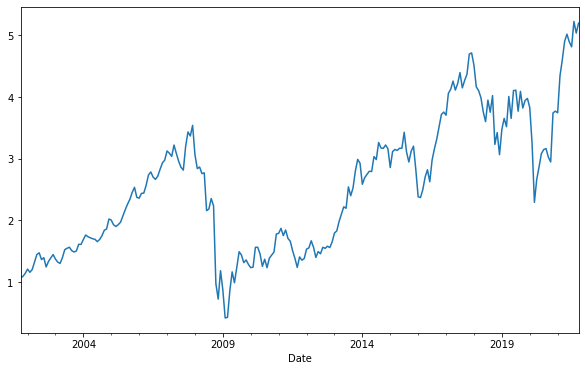

In [19]:
# cumulative monthly returns

rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))
plt.show()

## Adding Lag Features to Time Series

In [20]:
pfg_close = pd.DataFrame(pfg_data.AdjClose)
pfg_close.columns = ['Price']
pfg_close.tail()

,Price
Date,
2021-10-21,69.010002
2021-10-22,69.440002
2021-10-25,69.639999
2021-10-26,69.510002
2021-10-27,66.470001


In [21]:
pfg_close['1 Day Lag'] =  pfg_close.Price.shift(1)
pfg_close['7 Day Lag'] =  pfg_close.Price.shift(7)
pfg_close['30 Day Lag'] =  pfg_close.Price.shift(30)

pfg_close.head()

,Price,1 Day Lag,7 Day Lag,30 Day Lag
Date,,,,
2001-10-23,12.788093,NaN,NaN,NaN
2001-10-24,13.488389,12.788093,NaN,NaN
2001-10-25,13.366598,13.488389,NaN,NaN
2001-10-26,13.092568,13.366598,NaN,NaN
2001-10-29,12.909879,13.092568,NaN,NaN


### Rolling Statistics
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [22]:
# window defines the number of index values to include in the rolling statistics
win = 10
pfg_close['Min'] = pfg_close.Price.rolling(window=win).min()
pfg_close['Mean'] = pfg_close.Price.rolling(window=win).mean()
pfg_close['Max'] = pfg_close.Price.rolling(window=win).max()
pfg_close['StdDev'] = pfg_close.Price.rolling(window=win).std()

# EWMA is the exponentially weighted moving average
# this is using decay of halflife 0.5
pfg_close['EWMA'] = pfg_close.Price.ewm(halflife=0.5, min_periods=win).mean()

pfg_close.head(15)

,Price,1 Day Lag,7 Day Lag,30 Day Lag,Min,Mean,Max,StdDev,EWMA
Date,,,,,,,,,
2001-10-23,12.788093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-24,13.488389,12.788093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-25,13.366598,13.488389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-26,13.092568,13.366598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-29,12.909879,13.092568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-30,13.421410,12.909879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-31,13.701523,13.421410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-01,13.366598,13.701523,12.788093,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-02,13.506656,13.366598,13.488389,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pfg_close.dropna().tail()

,Price,1 Day Lag,7 Day Lag,30 Day Lag,Min,Mean,Max,StdDev,EWMA
Date,,,,,,,,,
2021-10-21,69.010002,69.769997,67.570000,65.260002,67.019997,68.513000,69.769997,0.786540,69.146829
2021-10-22,69.440002,69.010002,67.019997,64.870003,67.019997,68.565000,69.769997,0.832296,69.366709
2021-10-25,69.639999,69.440002,68.430000,65.940002,67.019997,68.717000,69.769997,0.879458,69.571677
2021-10-26,69.510002,69.639999,68.650002,65.139999,67.019997,68.911000,69.769997,0.809520,69.525421
2021-10-27,66.470001,69.510002,68.610001,66.080002,66.470001,68.856001,69.769997,0.957441,67.233856


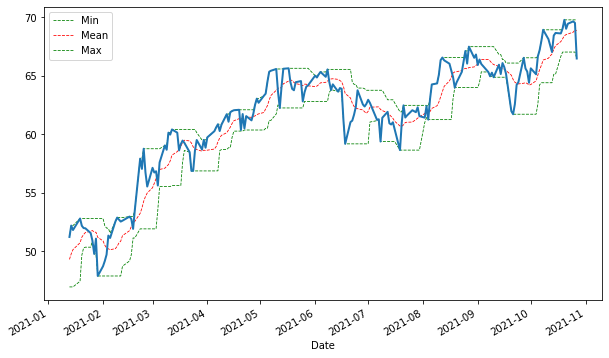

In [24]:
# plot some rolling stats and actual price for the last 200 days

ax = pfg_close[['Min','Mean','Max']].iloc[-200:].plot(figsize=(10,6), style=['g--','r--','g--'], lw=0.8)

pfg_close.Price.iloc[-200:].plot(ax=ax, lw=2.0)

plt.show()

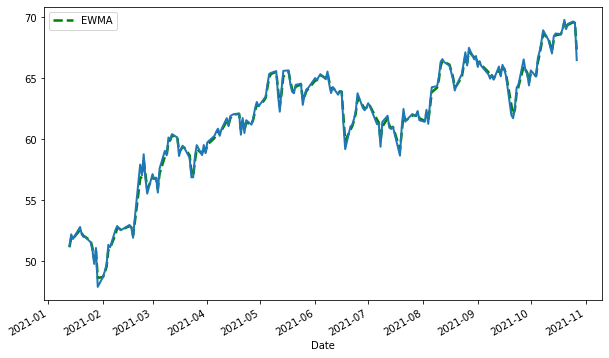

In [25]:
ax = pfg_close[['EWMA']].iloc[-200:].plot(figsize=(10,6), style=['g--'], lw=2.5)

pfg_close.Price.iloc[-200:].plot(ax=ax, lw=2.0)

plt.show()

In [26]:
pfg_close.head()

,Price,1 Day Lag,7 Day Lag,30 Day Lag,Min,Mean,Max,StdDev,EWMA
Date,,,,,,,,,
2001-10-23,12.788093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-24,13.488389,12.788093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-25,13.366598,13.488389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-26,13.092568,13.366598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-29,12.909879,13.092568,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pfg_close['SMA50'] = pfg_close.Price.rolling(window=50).mean()
pfg_close['SMA250'] = pfg_close.Price.rolling(window=250).mean()

pfg_close.tail()

,Price,1 Day Lag,7 Day Lag,30 Day Lag,Min,Mean,Max,StdDev,EWMA,SMA50,SMA250
Date,,,,,,,,,,,
2021-10-21,69.010002,69.769997,67.570000,65.260002,67.019997,68.513000,69.769997,0.786540,69.146829,66.088812,58.123831
2021-10-22,69.440002,69.010002,67.019997,64.870003,67.019997,68.565000,69.769997,0.832296,69.366709,66.146616,58.240157
2021-10-25,69.639999,69.440002,68.430000,65.940002,67.019997,68.717000,69.769997,0.879458,69.571677,66.213174,58.367433
2021-10-26,69.510002,69.639999,68.650002,65.139999,67.019997,68.911000,69.769997,0.809520,69.525421,66.282879,58.498418
2021-10-27,66.470001,69.510002,68.610001,66.080002,66.470001,68.856001,69.769997,0.957441,67.233856,66.303076,58.613898


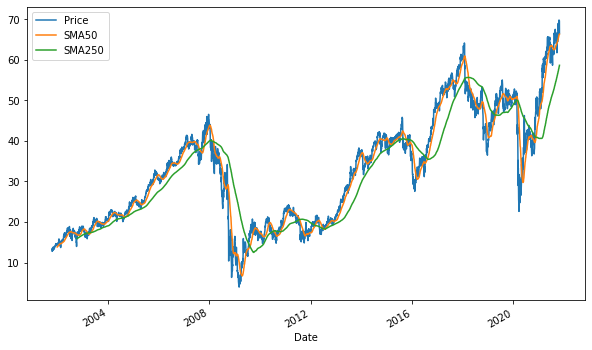

In [28]:
# plot price in the context of two simple moving averages
pfg_close[['Price','SMA50','SMA250']].plot(figsize=(10,6))
plt.show()

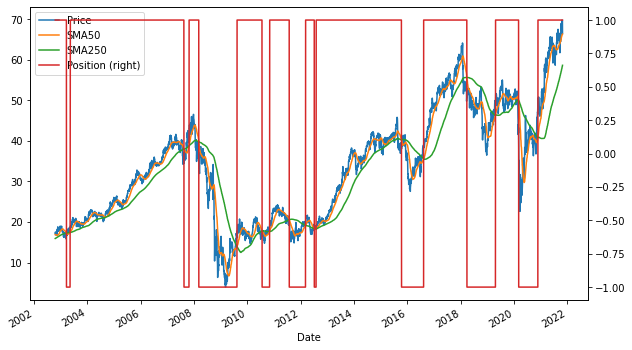

In [29]:
# change position when SMA50 crosses SMA250
# go long (buy) when SMA50 is greater than SMA250
# otherwise, go short (sell)

pfg_close.dropna(inplace=True)
pfg_close['Position'] = np.where(pfg_close.SMA50 > pfg_close.SMA250, 1, -1)
ax = pfg_close[['Price','SMA50','SMA250','Position']].plot(figsize=(10,6), secondary_y='Position')
plt.show()

### Correlation Analysis

In [30]:
vix_close = pd.read_csv('../../Data/^VIX.csv',header=0, index_col=0, parse_dates=True, usecols=['Date','Adj Close'])
vix_close.columns = ['VIX']
vix_close.head()

,VIX
Date,
2016-01-04,20.700001
2016-01-05,19.340000
2016-01-06,20.590000
2016-01-07,24.990000
2016-01-08,27.010000


In [31]:
corr_data = pd.concat([pfg_close[['Price','1 Day Lag','7 Day Lag','30 Day Lag']],vix_close], axis=1, join='inner')
corr_data.head()

,Price,1 Day Lag,7 Day Lag,30 Day Lag,VIX
Date,,,,,
2016-01-04,35.325649,36.079659,35.943295,40.485172,20.700001
2016-01-05,35.405869,35.325649,36.657185,40.381676,19.340000
2016-01-06,33.945999,35.405869,36.625107,40.469254,20.590000
2016-01-07,32.269558,33.945999,36.552902,40.445366,24.990000
2016-01-08,32.197361,32.269558,37.026169,40.405563,27.010000


In [32]:
rets = np.log(corr_data/corr_data.shift(1))
rets.tail()

,Price,1 Day Lag,7 Day Lag,30 Day Lag,VIX
Date,,,,,
2021-03-09,-0.006336,0.024909,-0.021506,-0.007887,-0.058198
2021-03-10,0.024619,-0.006336,0.028402,-0.012712,-0.063125
2021-03-11,-0.002778,0.024619,-0.007068,-0.022399,-0.029235
2021-03-12,0.007338,-0.002778,0.001901,0.025830,-0.057293
2021-03-15,-0.004560,0.007338,-0.021645,-0.064450,-0.032419


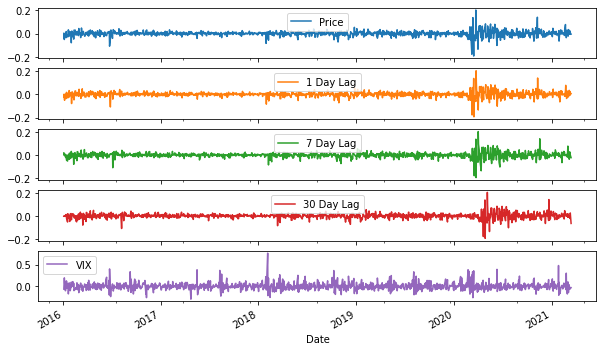

In [33]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10,6))
plt.show()

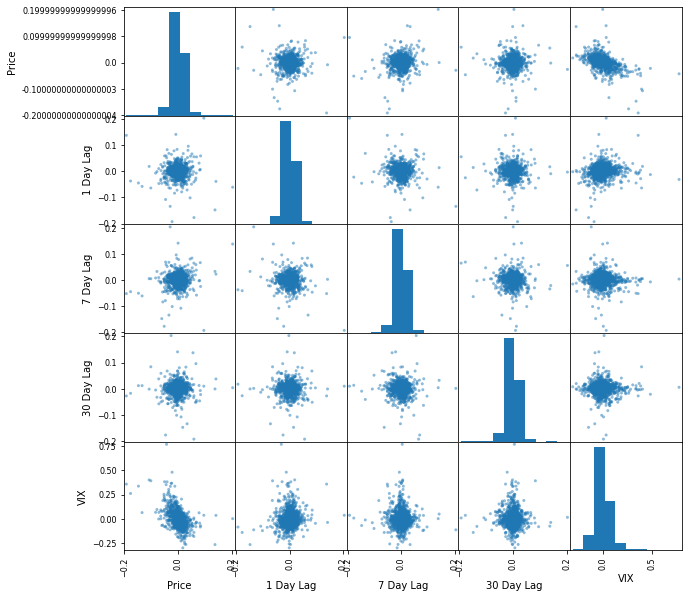

In [34]:
pd.plotting.scatter_matrix(rets, figsize=(10,10), diagonal="hist")
plt.show()

In [35]:
rets.corr()

,Price,1 Day Lag,7 Day Lag,30 Day Lag,VIX
Price,1.000000,-0.011793,0.138735,0.013902,-0.494139
1 Day Lag,-0.011793,1.000000,-0.103384,-0.017373,0.114082
7 Day Lag,0.138735,-0.103384,1.000000,-0.051019,-0.030972
30 Day Lag,0.013902,-0.017373,-0.051019,1.000000,-0.009733
VIX,-0.494139,0.114082,-0.030972,-0.009733,1.000000


## Stationarity of a Time Series

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

We will use what we learn from examining the stationarity of the time series as input into the configuration of the modeling algorithms.

In [36]:
pfg_close = pd.read_csv('../../Data/PFG.csv',header=0, index_col=0, parse_dates=True, usecols=['Date','Adj Close'])
pfg_close.columns = ['Price']
pfg_close.head()

,Price
Date,
2016-01-04,35.991669
2016-01-05,36.073399
2016-01-06,34.585995
2016-01-07,32.877945
2016-01-08,32.804390


### Summary Statistics to Check Stationarity of a Time Series

- Using the means and variances of a split dataset to see if there are significant differences
- First, need to check that data is normal (follows Gaussian distribution)

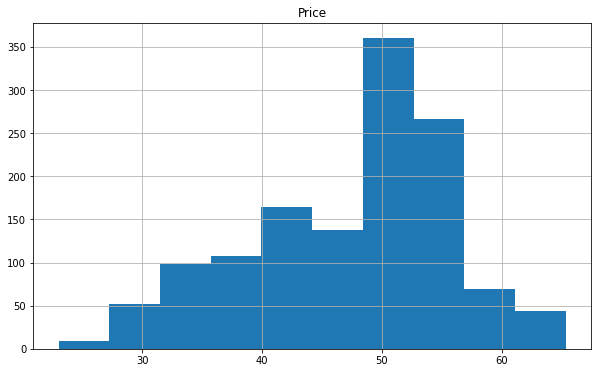

In [37]:
pfg_close.hist(figsize=(10,6))
plt.show()

#### Check the Mean and Variance of Split Dataset

- Split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values. 
- The mean and variance values can be different, but if they are close it is an indication the series is stationary.

In [38]:
X=pfg_close.Price.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=48.229296, mean2=46.408806
variance1=87.350879, variance2=47.488537


In [39]:
# use log transform to see if it improves the variance

import numpy as np

X=np.log(pfg_close.Price.values)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=3.855025, mean2=3.824890
variance1=0.044341, variance2=0.027138


### Augmented Dickey-Fuller Test

Statistical tests can provide a quick check to see whether your time series is stationary or non-stationary.
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend or seasonality.

The Null hypothesis of the ADF Test is NON stationary.
So we're looking for a p-value <= .05 and a test statistic that is more negative than 1% critical value to reject the null hypothesis of non-stationary, suggesting the data does not have a unit root and is stationary.

In [40]:
from statsmodels.tsa.stattools import adfuller

## use ADF to check the stationarity.  Null hypothesis is NON stationary.
## a p-value <= .05 and a test statistic that is more negative than 1% critical value indicates a stationary series
X = pfg_close.Price.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.317276
p-value: 0.166457
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


## Time Series Decomposition

A series is thought to be an aggregate or combination of the four components:

- **Level:** The average value in the series.
- **Trend:** The increasing or decreasing value in the series.
- **Seasonality:** The repeating short-term cycle in the series.
- **Noise:** The random variation in the series.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either **additively** or **multiplicatively**.

#### Additive Model
An additive model suggests that the components are added together as follows:

**y(t) = Level + Trend + Seasonality + Noise**

An additive model is linear where changes over time are consistently made by the same amount, with a linear trend that is a straight line and a linear seasonality that has the same frequency (width of cycles) and amplitude (height of cycles).

#### Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:

**y(t) = Level * Trend * Seasonality * Noise**

A multiplicative model is nonlinear, such as quadratic or exponential with changes increasing or decreasing over time, with a nonlinear trend represented as a curved line, and a non-linear seasonality that has an increasing or decreasing frequency and/or amplitude over time.


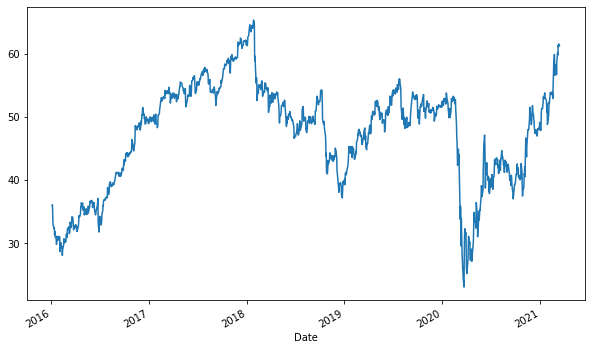

In [41]:
series = pfg_close.Price
series.plot(figsize=(10,6))
plt.show()

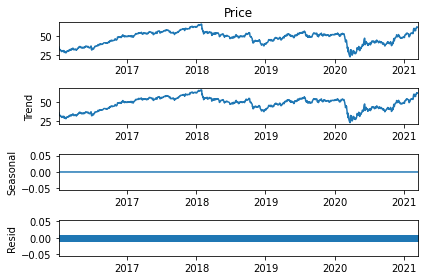

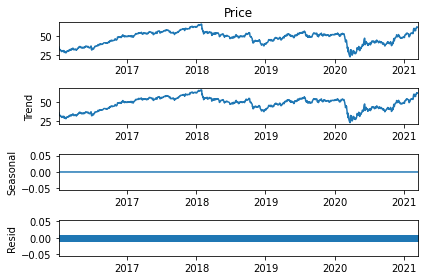

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(series, model='addititive', period=1)
#decomposition = seasonal_decompose(series, model='multiplicative', period=1)
decomposition.plot()